In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime 
# For data visualization
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)


In [2]:
plt.style.use("Solarize_Light2")

In [3]:
file_path = r"C:\Users\muski\Desktop\NewProject\Segementation\bank_transactions.csv"

df = pd.read_csv(file_path)
print(f'Data Shape: {df.shape}') 
print(f'Duplicates: {df.duplicated().sum()}') 
df.head(3)

Data Shape: (1048567, 9)
Duplicates: 0


TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  10/01/1994          F   JAMSHEDPUR   
1            T2   C2142763  04/04/1957          M      JHAJJAR   
2            T3   C4417068  26/11/1996          F       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      02/08/2016           143207   
1             2270.69      02/08/2016           141858   
2            17874.44      02/08/2016           142712   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0

In [4]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column   dtypes  nunique  sum_null
0            TransactionID   object  1048567         0
1               CustomerID   object   884265         0
2              CustomerDOB   object    17254      3397
3               CustGender   object        3      1100
4             CustLocation   object     9355       151
5       CustAccountBalance  float64   161328      2369
6          TransactionDate   object       55         0
7          TransactionTime    int64    81918         0
8  TransactionAmount (INR)  float64    93024         0

In [5]:
%%time
hour = [int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]

# Categorizing Time Periods
time = []

# Iterate over each extracted hour
for i in hour:
    # Morning: hours between 0 (inclusive) and 12 (exclusive)
    if i >= 0 and i < 12:
        time.append("Morning")
    # Afternoon: hours between 12 (inclusive) and 17 (inclusive)
    elif i >= 12 and i <= 17:
        time.append("Afternoon")
    # Evening: hours between 17 (exclusive) and 19 (inclusive)
    elif i > 17 and i <= 19:
        time.append("Evening")
    # Night: hours greater than 19
    elif i > 19:
        time.append("Night")

CPU times: total: 2.38 s
Wall time: 4.7 s


In [6]:
df["TransactionHourOfDay"] = hour
df["TransactionTimeOfDay"] = time

In [7]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

## Split Transaction date in to day, month
df['Day'] = df['TransactionDate'].dt.dayofweek
df['Day'] =df['Day'] + 1
df['Month'] = df['TransactionDate'].dt.month

In [8]:
#drop na in 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'

drop_column = ['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']
df.dropna(subset=drop_column, inplace=True)

In [9]:
# Age
df['Age'] = ((datetime.today() - df['CustomerDOB']).dt.total_seconds() / (365.25 * 24 * 3600)).astype(int)

# Drop DOB
df.drop(columns=['CustomerDOB'], inplace=True)

# Remove the Gender = T
df.drop(df[df['CustGender'] == 'T'].index, inplace=True)

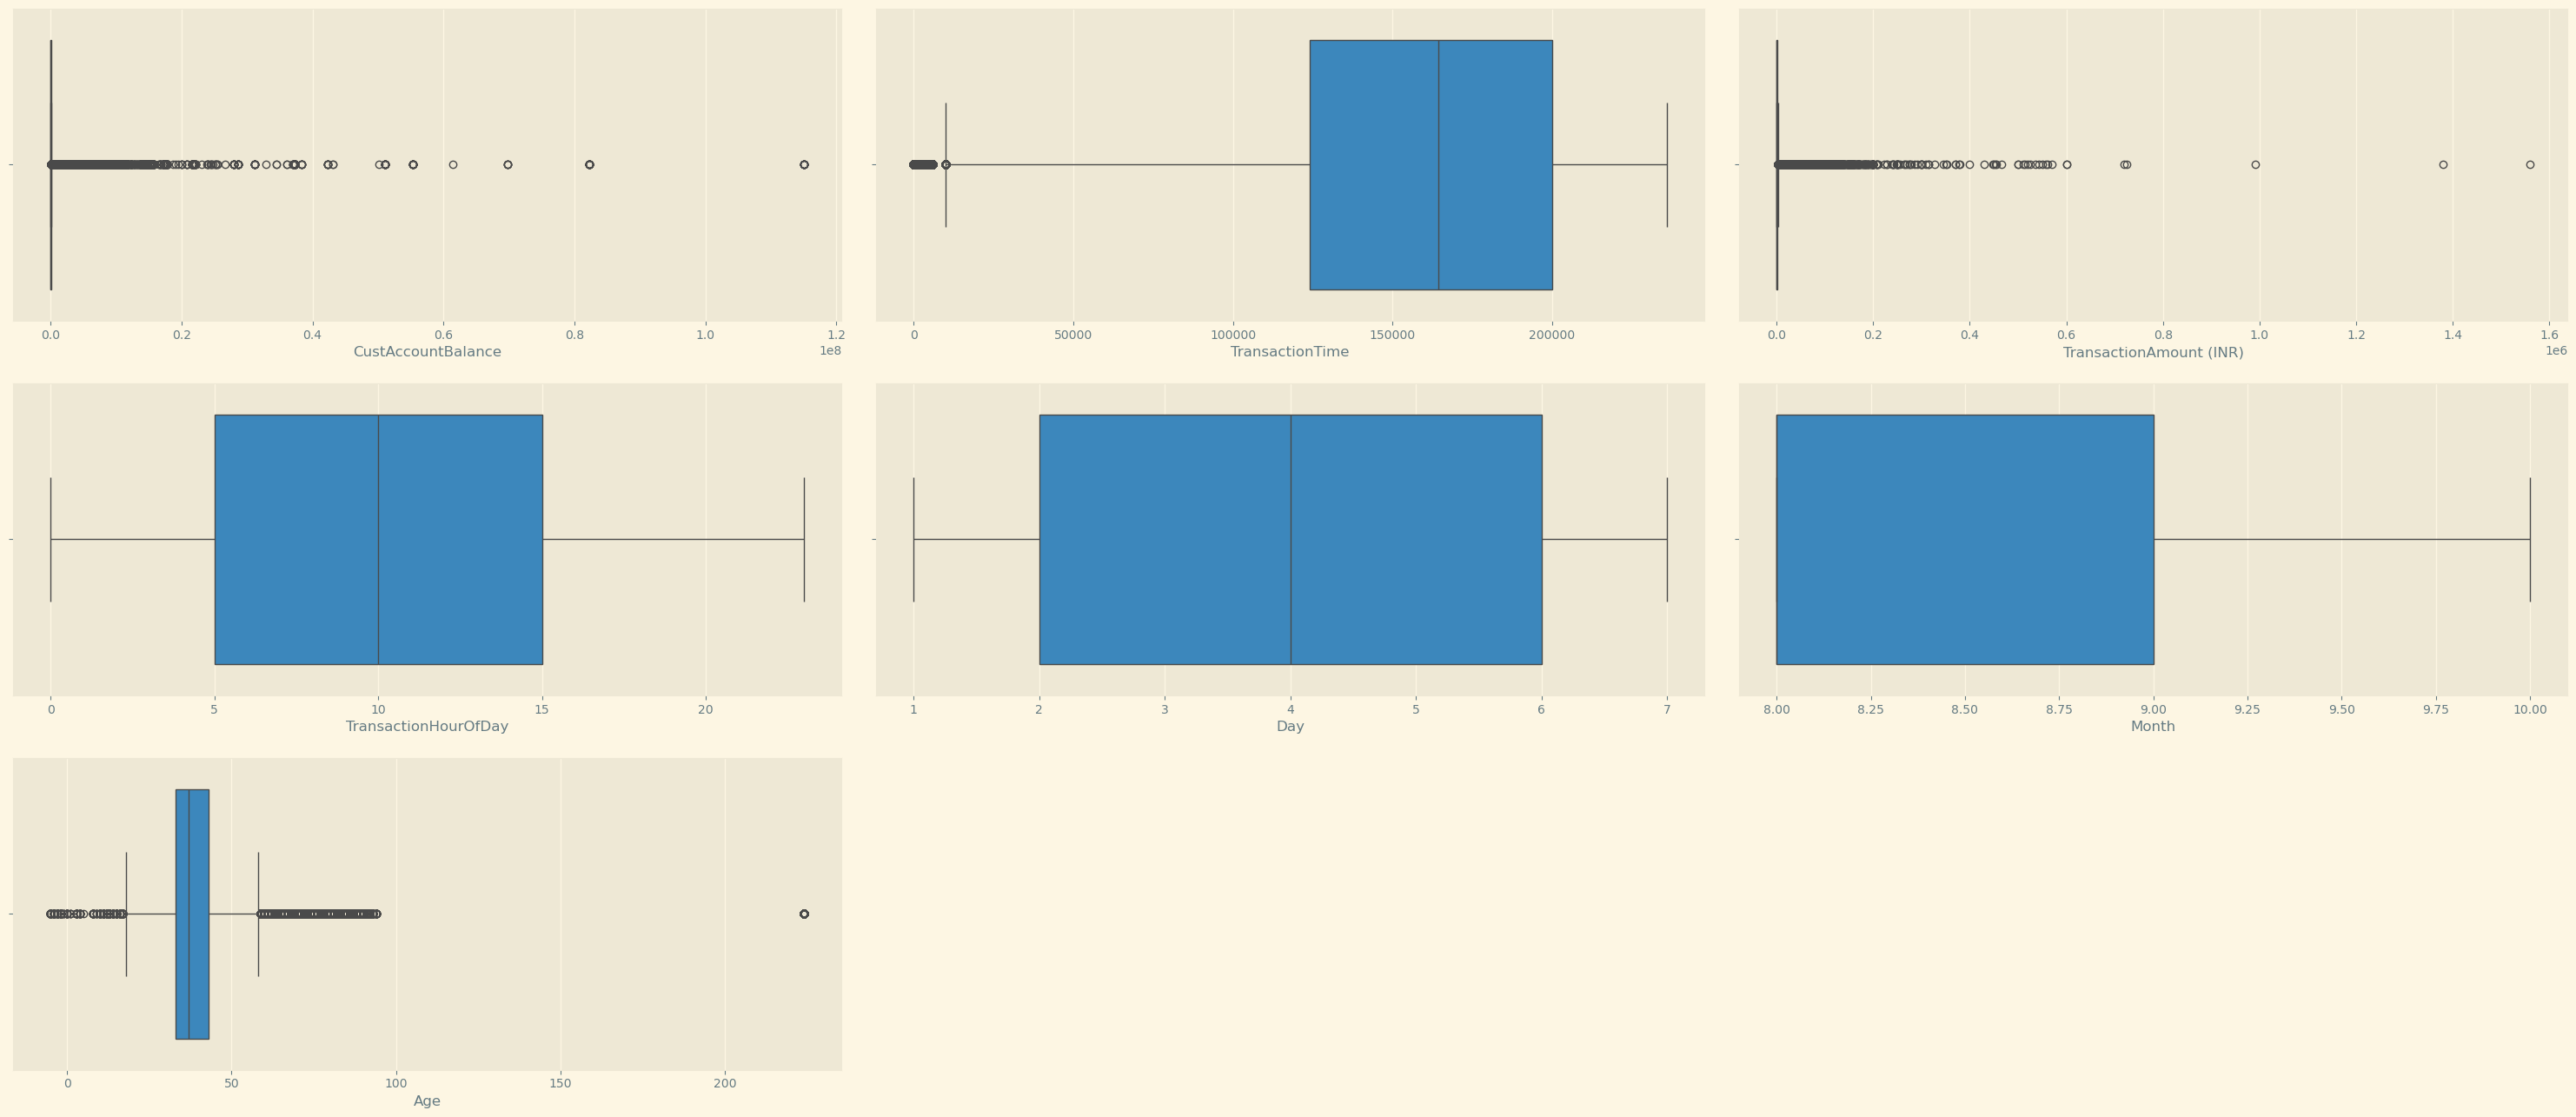

In [10]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)
num_col.sample(3)

#plot box plot
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,3,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 2.0)

In [11]:
df['Age'].value_counts()

Age
 33    73043
 34    70340
 32    70057
 35    64592
 31    64345
       ...  
 0         9
 9         4
-1         3
 1         3
 5         1
Name: count, Length: 98, dtype: int64

In [12]:
# Filter out rows where Age is 9 or less than 95
df = df.drop(df[(df['Age'] <= 9) | (df['Age'] > 95)].index)
# 2. Confirm that it worked
df['Age'].describe()
df.drop(df[df['TransactionAmount (INR)'] < 1].index, inplace=True)

# Drop the 'TransactionTime' column
df = df.drop(columns=['TransactionTime'])

In [13]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column          dtypes  nunique  sum_null
0             TransactionID          object   984131         0
1                CustomerID          object   838200         0
2                CustGender          object        2         0
3              CustLocation          object     8160         0
4        CustAccountBalance         float64   152714         0
5           TransactionDate  datetime64[ns]       55         0
6   TransactionAmount (INR)         float64    86687         0
7      TransactionHourOfDay           int64       24         0
8      TransactionTimeOfDay          object        4         0
9                       Day           int32        7         0
10                    Month           int32        3         0
11                      Age           int32       85         0

In [14]:
df.describe()

CustAccountBalance                TransactionDate  \
count        9.841310e+05                         984131   
mean         1.059394e+05  2016-08-25 04:15:49.936949504   
min          0.000000e+00            2016-08-01 00:00:00   
25%          4.583380e+03            2016-08-12 00:00:00   
50%          1.599741e+04            2016-08-25 00:00:00   
75%          5.366730e+04            2016-09-06 00:00:00   
max          1.150355e+08            2016-10-21 00:00:00   
std          8.176499e+05                            NaN   

       TransactionAmount (INR)  TransactionHourOfDay            Day  \
count             9.841310e+05         984131.000000  984131.000000   
mean              1.453261e+03             10.418930       4.054459   
min               1.000000e+00              0.000000       1.000000   
25%               1.530000e+02              5.000000       2.000000   
50%               4.330000e+02             10.000000       4.000000   
75%               1.127000e+03             15.000000       6.000000   
max               1.560035e+06             23.000000       7.000000   
std               6.140678e+03              6.499903       2.050222   

               Month            Age  
count  984131.000000  984131.000000  
mean        8.380745      38.262760  
min         8.000000      10.000000  
25%         8.000000      32.000000  
50%         8.000000      36.000000  
75%         9.000000      42.000000  
max        10.000000      94.000000  
std         0.492640       8.721534

In [15]:
# 1. Create `map_dictionary`
map_dictionary = {'F': 2, 'M': 1}

# 2. Create new `device_type` column
df['Gender'] = df['CustGender']

# 3. Map the new column to the dictionary
df['Gender'] = df['Gender'].map(map_dictionary)

df['Gender'].head()

0    2
1    1
2    2
3    2
4    2
Name: Gender, dtype: int64

C:\Users\muski\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


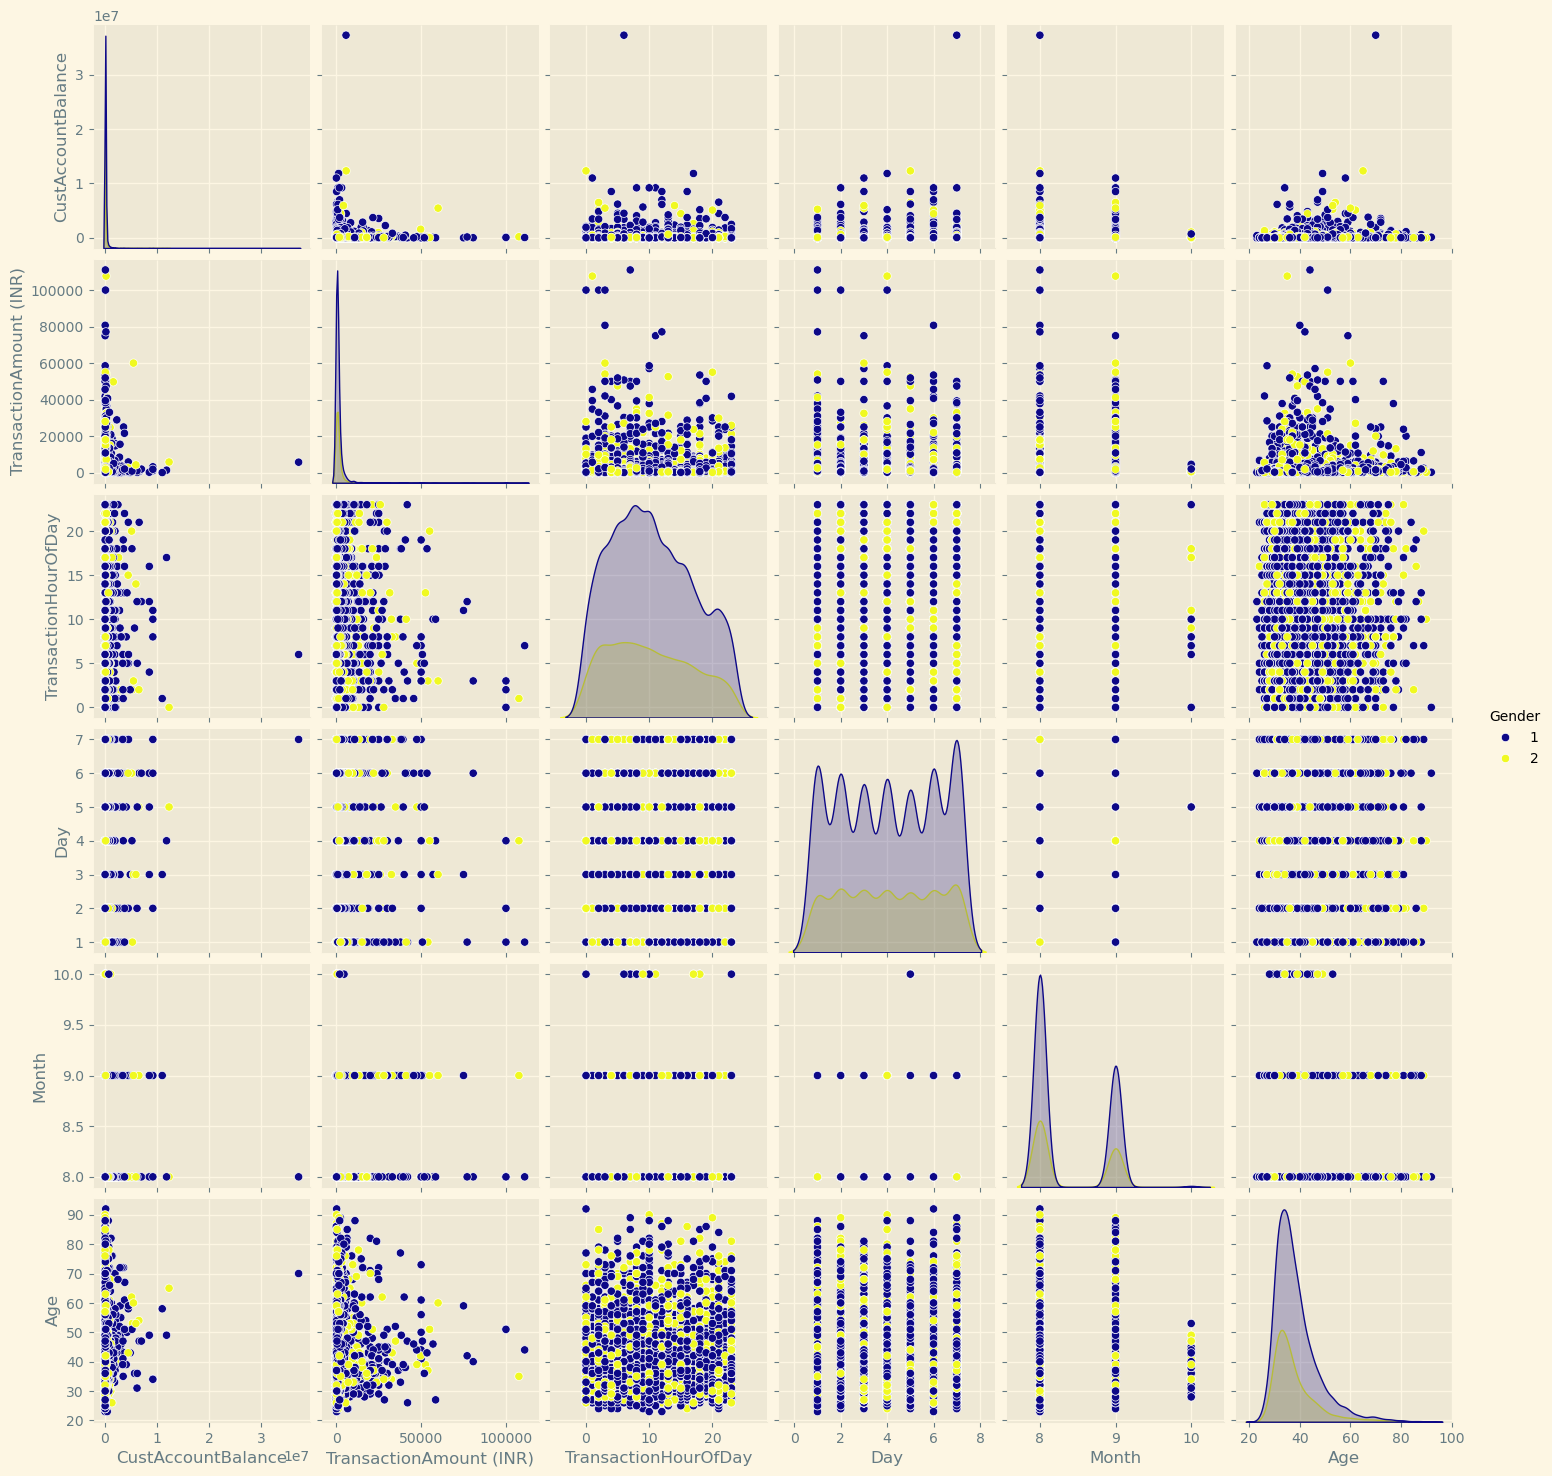

In [16]:
sns.pairplot(df.sample(n=10000),hue='Gender',palette='plasma')

In [17]:
gender_mean = df.groupby('Gender')['TransactionAmount (INR)'].mean()
print(gender_mean)

Gender
1    1397.057534
2    1599.960260
Name: TransactionAmount (INR), dtype: float64



**Hypotheses:**

$H_0$: There is no difference in average number of Transaction Amount between Male and Female.

$H_A$: There is a difference in average number of Transaction Amount between Male and Female.

In [18]:
# 1. Isolate the `drives` column for iPhone users.
Male = df[df['Gender'] == 1]['TransactionAmount (INR)']

# 2. Isolate the `drives` column for Android users.
Female = df[df['Gender'] == 2]['TransactionAmount (INR)']

# 3. Perform the t-test
stats.ttest_ind(a=Male, b=Female, equal_var=False)

TtestResult(statistic=-14.535126729777225, pvalue=7.428505833105959e-48, df=484694.2017208234)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

> *Since the p-value is smaller than the chosen significance level (5%), you  reject the null hypothesis. You conclude that there is **a** statistically significant difference in the average number of Transaction Amount between Male and Female.*

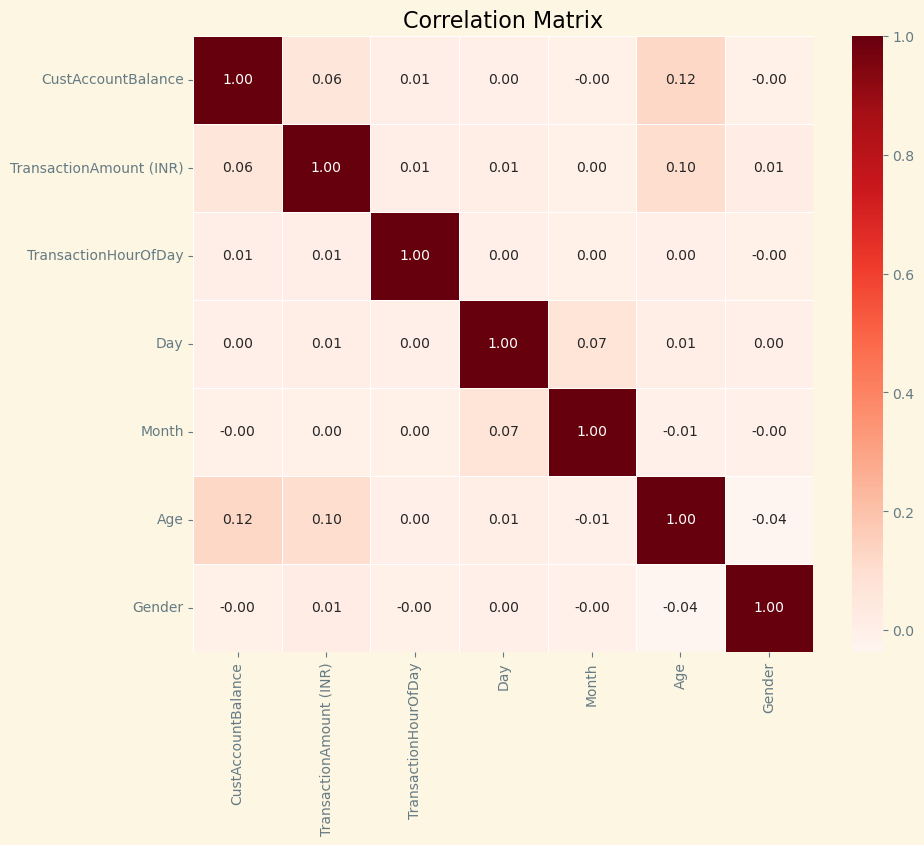

In [19]:
num_col = df.select_dtypes(include=np.number)
corr = num_col.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## RFM

In [20]:
max_date = df['TransactionDate'].max()
max_date

Timestamp('2016-10-21 00:00:00')

In [21]:
%%time
# Create RFM 
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (max_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

CPU times: total: 48.7 s
Wall time: 1min 36s


In [22]:
rfm.describe()

Recency      Frequency      Monetary
count  838200.000000  838200.000000  8.382000e+05
mean       55.407552       1.174100  1.706275e+03
std        15.219285       0.434907  6.688150e+03
min         0.000000       1.000000  1.000000e+00
25%        43.000000       1.000000  1.990000e+02
50%        55.000000       1.000000  5.000000e+02
75%        68.000000       1.000000  1.420000e+03
max        81.000000       6.000000  1.560035e+06

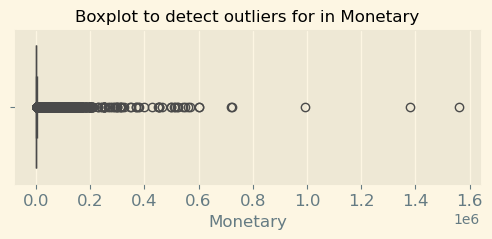

In [23]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for in Monetary', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=rfm['Monetary'])
plt.show()

In [24]:
# Get the top 5 customers with the highest recency
top_5_recency = rfm.nlargest(5, 'Recency')

# Get the top 5 customers with the highest frequency
top_5_frequency = rfm.nlargest(5, 'Frequency')

# Get the top 5 customers with the highest monetary values
top_5_monetary = rfm.nlargest(5, 'Monetary')

print("Top 5 customers with the highest recency:")
print(top_5_recency)

print("\nTop 5 customers with the highest frequency:")
print(top_5_frequency)

print("\nTop 5 customers with the highest monetary:")
print(top_5_monetary)


Top 5 customers with the highest recency:
            Recency  Frequency  Monetary
CustomerID                              
C1010078         81          1     124.0
C1010241         81          1      22.0
C1010431         81          1     295.0
C1010578         81          1     747.0
C1010648         81          1      53.0

Top 5 customers with the highest frequency:
            Recency  Frequency  Monetary
CustomerID                              
C1026833         45          6   3336.00
C1736254         53          6   5554.50
C3226689         21          6  14758.39
C6222360         36          6   5825.00
C6624352         24          6   8375.74

Top 5 customers with the highest monetary:
            Recency  Frequency    Monetary
CustomerID                                
C7319271         64          1  1560034.99
C6677159         60          1  1380002.88
C4141768         59          1   991132.22
C8217728         47          2   724472.00
C1830891         79          1   7200

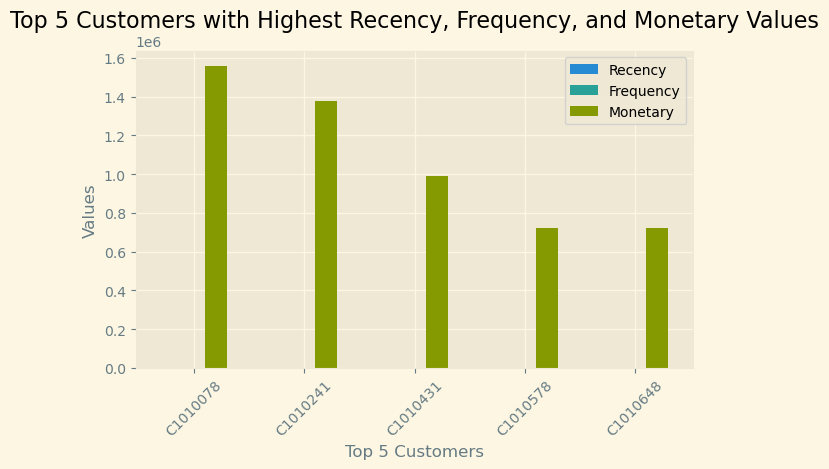

In [25]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Define positions for bars
bar_width = 0.2
index = range(5)

# Plot bars for recency
ax.bar(index, top_5_recency['Recency'], bar_width, label='Recency')

# Plot bars for frequency
ax.bar([i + bar_width for i in index], top_5_frequency['Frequency'], bar_width, label='Frequency')

# Plot bars for monetary
ax.bar([i + 2*bar_width for i in index], top_5_monetary['Monetary'], bar_width, label='Monetary')

# Set labels and title
ax.set_xlabel('Top 5 Customers')
ax.set_ylabel('Values')
ax.set_title('Top 5 Customers with Highest Recency, Frequency, and Monetary Values')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(top_5_recency.index)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## Data Modelling

In [26]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import random
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 
import plotly.graph_objects as go


In [27]:
df1 = df.copy()
df1.sample(2)

TransactionID CustomerID CustGender CustLocation  CustAccountBalance  \
745360       T745361   C3513165          F       MUMBAI            10920.68   
779066       T779067   C5339144          M      GURGAON            15729.34   

       TransactionDate  TransactionAmount (INR)  TransactionHourOfDay  \
745360      2016-09-02                    350.0                    14   
779066      2016-09-06                    240.0                     4   

       TransactionTimeOfDay  Day  Month  Age  Gender  
745360            Afternoon    5      9   31       2  
779066              Morning    2      9   34       1

In [28]:
%%time
df1 = pd.get_dummies(df1, columns=['Gender'], drop_first=True)
df1 = df1.rename(columns={'Gender_2': 'Gender'})


le = preprocessing.LabelEncoder()
df1['CustLocation']= le.fit_transform(df1['CustLocation'])

df1 = df1.drop(df1[df1['TransactionAmount (INR)'] == 0].index,axis = 0)
print(df1.shape)

(984131, 13)
CPU times: total: 328 ms
Wall time: 610 ms


In [29]:
df1 = df1.drop_duplicates(subset='CustomerID')
df1 = pd.merge(df1, rfm, on='CustomerID')
df1.head()

TransactionID CustomerID CustGender  CustLocation  CustAccountBalance  \
0            T1   C5841053          F          3116            17819.05   
1            T2   C2142763          M          3173             2270.69   
2            T3   C4417068          F          4623            17874.44   
3            T4   C5342380          F          4623           866503.21   
4            T5   C9031234          F          4963             6714.43   

  TransactionDate  TransactionAmount (INR)  TransactionHourOfDay  \
0      2016-08-02                     25.0                    15   
1      2016-08-02                  27999.0                    15   
2      2016-08-02                    459.0                    15   
3      2016-08-02                   2060.0                    15   
4      2016-08-02                   1762.5                     2   

  TransactionTimeOfDay  Day  Month  Age  Gender  Recency  Frequency  Monetary  
0            Afternoon    2      8   30    True       80          1      25.0  
1            Afternoon    2      8   66   False       80          1   27999.0  
2            Afternoon    2      8   27    True       80          1     459.0  
3            Afternoon    2      8   50    True       69          2    2938.4  
4              Morning    2      8   36    True       80          1    1762.5

In [30]:
# drop columns
drop = ['CustGender', 'TransactionID', 'CustomerID', 'TransactionDate', 'TransactionHourOfDay', 'TransactionTimeOfDay', 'Day', 'Month']
df1 = df1.drop(columns=drop)
df1.isna().sum()

CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
Age                        0
Gender                     0
Recency                    0
Frequency                  0
Monetary                   0
dtype: int64

In [31]:
## Show detailes data set
def check(df1):
    l=[]
    columns=df1.columns
    for col in columns:
        dtypes=df1[col].dtypes
        nunique=df1[col].nunique()
        sum_null=df1[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df1)

column   dtypes  nunique  sum_null
0             CustLocation    int32     7890         0
1       CustAccountBalance  float64   146313         0
2  TransactionAmount (INR)  float64    77688         0
3                      Age    int32       85         0
4                   Gender     bool        2         0
5                  Recency    int64       55         0
6                Frequency    int64        6         0
7                 Monetary  float64    96655         0

In [32]:
df1.describe()

CustLocation  CustAccountBalance  TransactionAmount (INR)  \
count  838200.000000        8.382000e+05             8.382000e+05   
mean     3593.294906        1.052838e+05             1.456580e+03   
std      2082.466222        8.024421e+05             6.264095e+03   
min         0.000000        0.000000e+00             1.000000e+00   
25%      1805.000000        4.557795e+03             1.540000e+02   
50%      3506.000000        1.597613e+04             4.340000e+02   
75%      5063.000000        5.367410e+04             1.130000e+03   
max      8159.000000        1.150355e+08             1.560035e+06   

                 Age        Recency      Frequency      Monetary  
count  838200.000000  838200.000000  838200.000000  8.382000e+05  
mean       38.263283      55.407552       1.174100  1.706275e+03  
std         8.718372      15.219285       0.434907  6.688150e+03  
min        10.000000       0.000000       1.000000  1.000000e+00  
25%        32.000000      43.000000       1.000000  1.990000e+02  
50%        36.000000      55.000000       1.000000  5.000000e+02  
75%        42.000000      68.000000       1.000000  1.420000e+03  
max        94.000000      81.000000       6.000000  1.560035e+06

In [33]:
ch = df['TransactionAmount (INR)'] == 0
ch.value_counts(normalize=True)

TransactionAmount (INR)
False    1.0
Name: proportion, dtype: float64

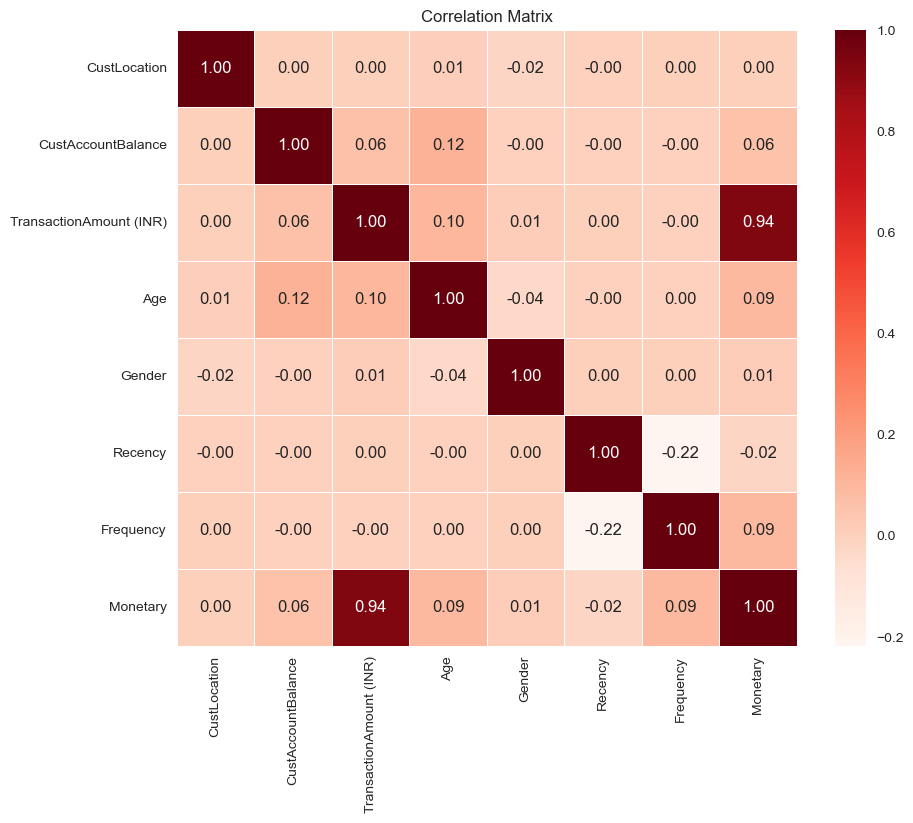

In [34]:
corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## The k-means clustering

The k-means clustering is a method of vector quantization, originally from signal processing, that
The Elbow method is a graphical representation of finding the optimal 'K' in a K-means cluster

In [35]:
df2 = df1.copy()
df2.sample(4)
df2.shape

(838200, 8)

In [36]:
population_mean = np.mean(df2)
print("Population mean:", population_mean)

sample_df =df2.sample(n=8382,random_state=42).reset_index(drop=True)
sample_mean = np.mean(sample_df)
print("Sample mean:", sample_mean)

Population mean: 14016.880933631202
Sample mean: 14171.233295305425


In [37]:
columns =['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age', 'Gender', 'Recency', 'Frequency','Monetary']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns)
df2.tail()

CustLocation  CustAccountBalance  TransactionAmount (INR)       Age  \
838195      1.078388           -0.130625                 0.246392  0.543303   
838196     -1.402806           -0.129693                 0.006932 -0.833101   
838197      0.705753           -0.121689                -0.104976 -0.603701   
838198      0.647168           -0.097169                -0.159094 -0.718401   
838199      2.104095           -0.118595                -0.072888  0.772704   

         Gender   Recency  Frequency  Monetary  
838195 -0.61919 -1.472314  -0.400317  0.193436  
838196 -0.61919 -1.472314  -0.400317 -0.030842  
838197 -0.61919 -1.472314  -0.400317 -0.135654  
838198 -0.61919 -1.472314  -0.400317 -0.186341  
838199 -0.61919 -1.472314  -0.400317 -0.105601

In [38]:
population_mean = np.mean(df2)
print("Population mean:", population_mean)

Population mean: 4.552152816788043e-17


In [39]:
df2 =df2.sample(n=8382,random_state=42).reset_index(drop=True)
sample_mean = np.mean(df2)
print("Sample mean:", sample_mean)

Sample mean: 0.002817625343541931


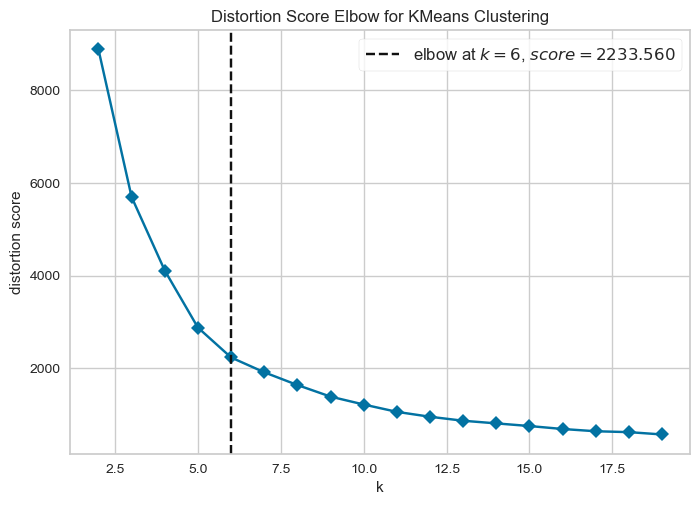

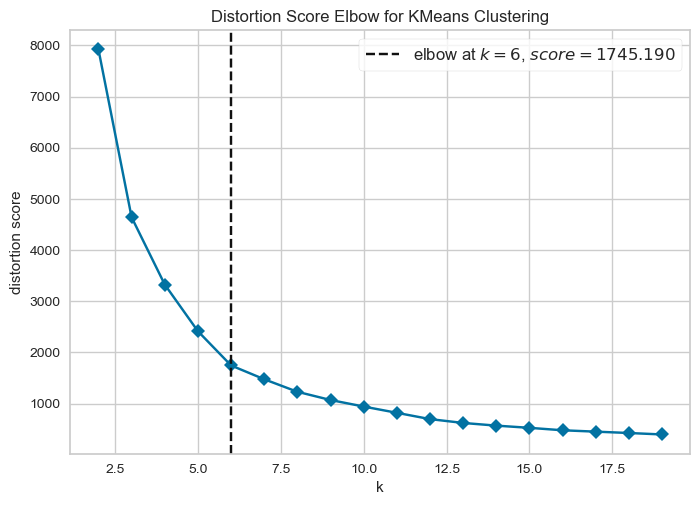

In [40]:
# Extract features from the DataFrame
X = df2[['Age', 'TransactionAmount (INR)']].values
# Remove the target variable 'TransactionAmount (INR)' from Y
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42, n_init=10)  # or n_init='auto'
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()

# Perform elbow method for clustering based on 'Age'
optimal_clusters_elbow_x = perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')

# Perform elbow method for clustering based on 'CustLocation'
optimal_clusters_elbow_y = perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

In [41]:
# Print the optimal number of clusters
print("Optimal Clusters for Customer Age (Elbow):", optimal_clusters_elbow_x)
print("Optimal Clusters for Customer Location (Elbow):", optimal_clusters_elbow_y)

Optimal Clusters for Customer Age (Elbow): None
Optimal Clusters for Customer Location (Elbow): None


In [42]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=6)

In [43]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

x_cluster_labels [1 1 1 ... 1 1 5]
x_cluster_centers [[ 1.27723070e+00  3.84796111e-03]
 [-7.34566211e-01 -1.12613401e-01]
 [ 4.65188318e-01  3.58671690e+00]
 [ 3.41736715e+00  5.22735288e-02]
 [ 1.27321477e+00  1.68234459e+01]
 [ 1.04981180e-01 -5.90181758e-02]]
y_cluster_labels [0 1 2 ... 1 1 5]
y_cluster_centers [[ 0.66673133 -0.06627558]
 [-1.19625761 -0.07878566]
 [-0.32676515 -0.07289063]
 [ 0.13715198 16.8234459 ]
 [ 0.04552387  3.49792134]
 [ 1.73211578 -0.07954964]]


In [44]:
# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(6)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(6)})

In [45]:
df2.tail(3)

CustLocation  CustAccountBalance  TransactionAmount (INR)       Age  \
8379     -0.858739           -0.125943                -0.017174 -0.603701   
8380     -0.858739           -0.108469                -0.179209 -0.374300   
8381      1.544182           -0.095043                -0.200600 -0.030199   

        Gender   Recency  Frequency  Monetary  cluster_age  cluster_location  \
8379  1.615012 -0.026779   6.497715  0.624385            1                 1   
8380 -0.619190 -1.012371  -0.400317 -0.205180            1                 1   
8381 -0.619190  0.236046  -0.400317 -0.225216            5                 5   

        cen_xx    cen_xy    cen_yx    cen_yy  
8379 -0.734566 -0.112613 -1.196258 -0.078786  
8380 -0.734566 -0.112613 -1.196258 -0.078786  
8381  0.104981 -0.059018  1.732116 -0.079550

In [46]:
# Define colors for each cluster
colors_X = ['purple', 'pink', 'magenta', 'blue', 'brown', 'red','cyan']
colors_Y = ['purple', 'pink', 'magenta', 'blue', 'brown', 'red','cyan']


# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(6)})

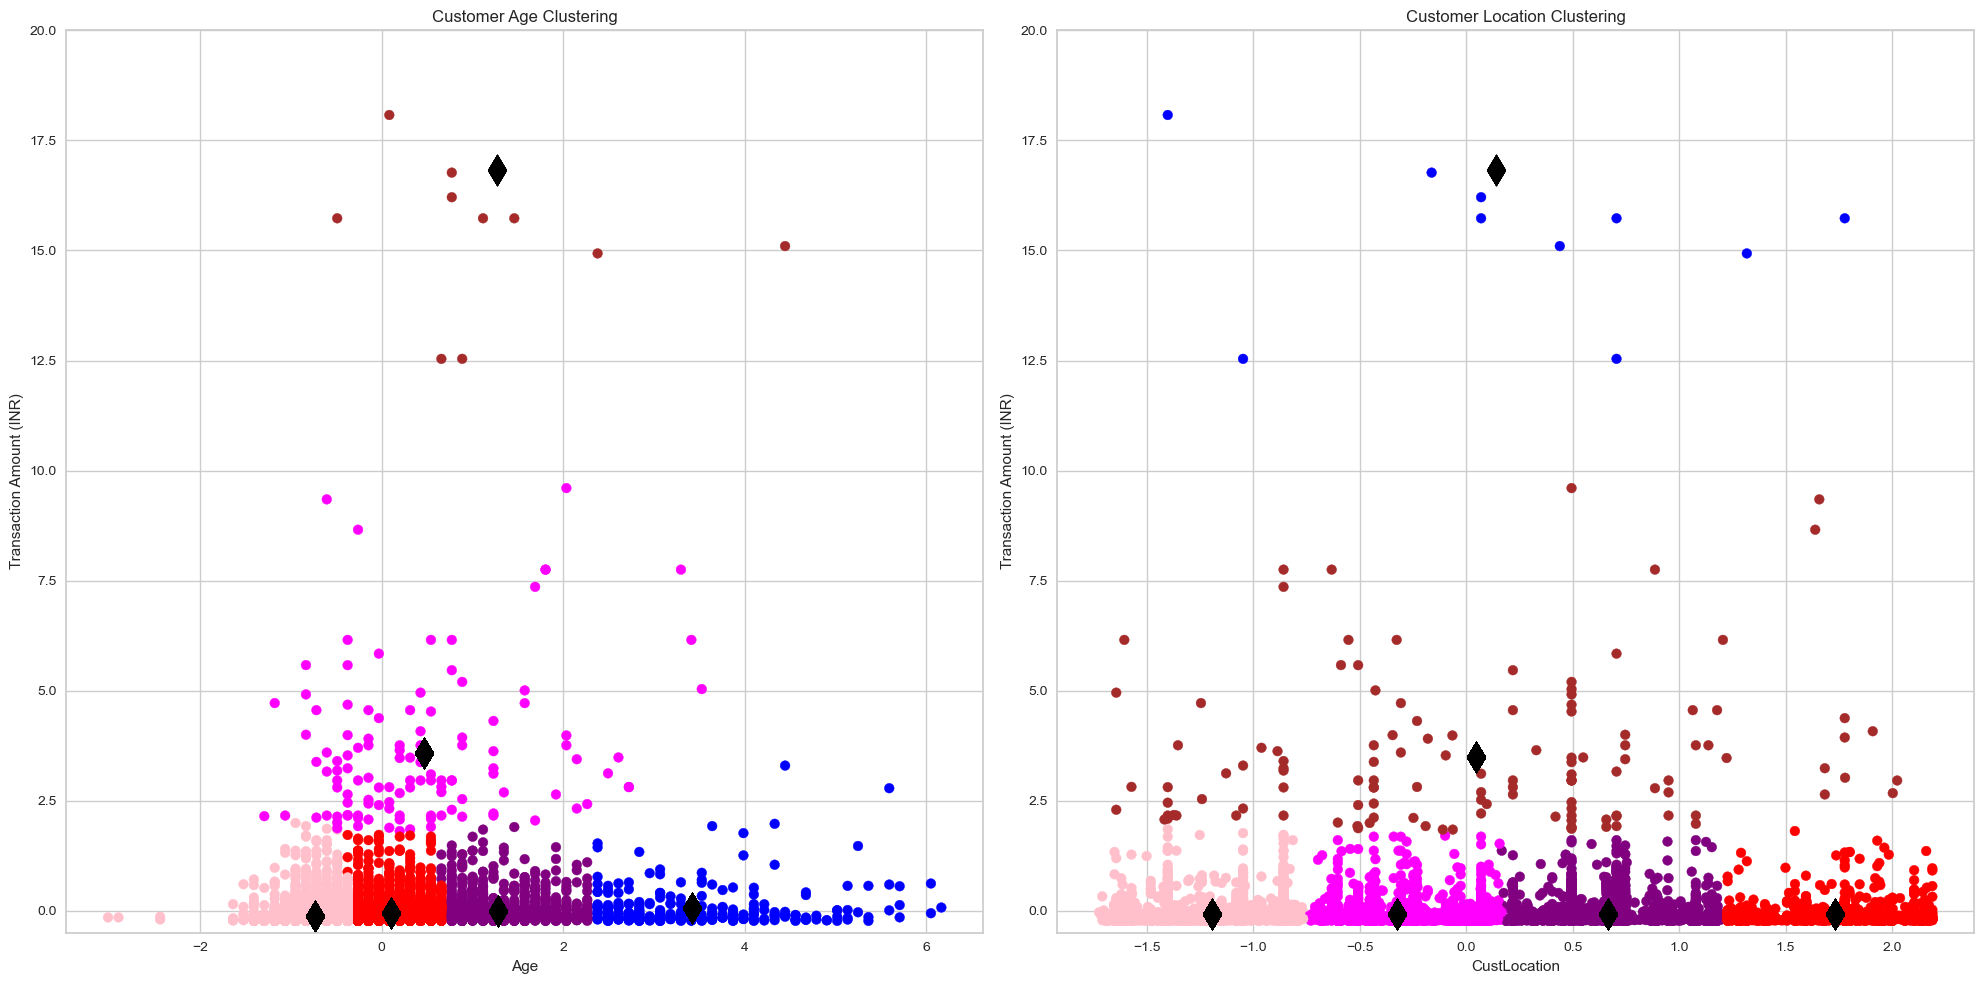

In [47]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['Age'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('Age')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

## Silhouette Coefficient

The Silhouette Score is a metric used to evaluate the quality of clustering results.
It measures how well-separated the clusters are and provides a numerical value between -1 and 1.

A score close to 1 indicates that the data point is well-clustered and far away from other clusters, representing good separation.
A score close to 0 suggests overlapping clusters or data points on the decision boundary between clusters.
A negative score indicates that the data point might have been assigned to the wrong cluster.

In [48]:
# Function to calculate silhouette score and return labels
def calculate_silhouette_score(X, clusters):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    return cluster_labels, silhouette_avg

# Silhouette Score for cluster_age
labels_age, silhouette_score_age = calculate_silhouette_score(df2[['TransactionAmount (INR)', 'Age']], clusters=6)

# Silhouette Score for cluster_location
labels_location, silhouette_score_location = calculate_silhouette_score(df2[['CustLocation', 'TransactionAmount (INR)']], clusters=6)


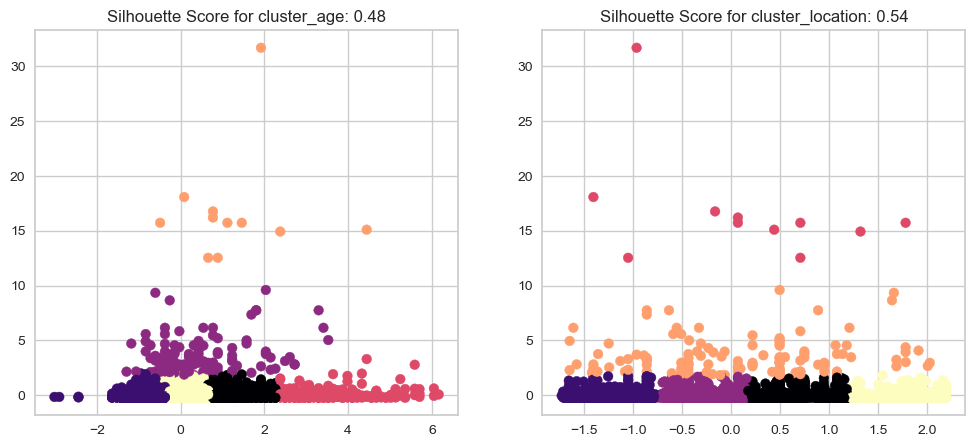

In [49]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot for Silhouette Score for cluster_age
axes[0].scatter(df2['Age'], df2['TransactionAmount (INR)'], c=labels_age, cmap='magma')
axes[0].set_title(f'Silhouette Score for cluster_age: {silhouette_score_age:.2f}')

# Subplot for Silhouette Score for cluster_location
axes[1].scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=labels_location, cmap='magma')
axes[1].set_title(f'Silhouette Score for cluster_location: {silhouette_score_location:.2f}')

plt.show()

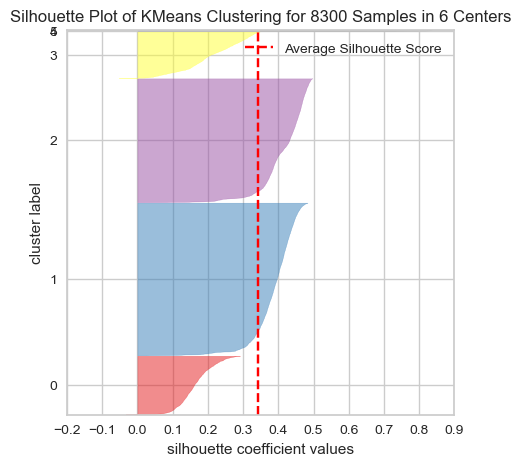

In [50]:
# Exclude non-numeric columns
exclude_columns_age = ['color_age_km', 'color_location_km']
df3 = df2.drop(exclude_columns_age, axis=1).sample(n=8300, random_state=42).reset_index(drop=True)

# Specify the number of clusters
n_clusters = 6

# Initialize KMeans
kmeans_s = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)

# Create a SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans_s, size=(500, 500))

# Fit the visualizer to the data
visualizer.fit(df3)
visualizer.show();

In [51]:
# Assuming df2 is your DataFrame
non_numeric_values = df2.select_dtypes(exclude='number')

non_numeric_values.sample(4)

color_age_km color_location_km
2196          red            purple
2731          red           magenta
3992       purple            purple
879          pink            purple

In [52]:
# Exclude specific columns when calculating cluster averages for 'cluster_age'
exclude_columns_age = ['color_age_km', 'color_location_km']
age_cluster_avg = df2.drop(exclude_columns_age, axis=1).groupby('cluster_age').mean().reset_index()


# Print cluster averages for 'cluster_age'
print("Cluster_Age") 
print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age']])


Cluster_Age
   CustLocation  CustAccountBalance  TransactionAmount (INR)       Age
0      0.019271            0.118738                 0.003848  1.277231
1     -0.007001           -0.074139                -0.112613 -0.734566
2      0.037198            0.137204                 3.586717  0.465188
3      0.025662            0.581585                 0.052274  3.417367
4      0.137152            0.082489                16.823446  1.273215
5     -0.035101           -0.008882                -0.059018  0.104981


Cluster_Age

* Cluster 0 : Younger customers with low transaction activity and lower account balances. 
* Cluster 1 : Younger customers with above-average account balances and significant  transaction amounts. They are financially active but have lower age and represent a group with potential for future growth.
* Cluster 2 : Older customers engage in moderate financial activity, with account balances and transaction amounts slightly above average
* Cluster 3 : Diverse group of customers exhibits moderate account balances but engages in substantial transaction activity.
* Cluster 4 : Younger customers who are financially stable, with moderate account balances and substantial transaction amounts. They represent a group with consistent financial activity.
* Cluster 5 : Older customers who exhibit significant financial stability and engagement. They maintain substantial account balances and engage in high-value transactions. Despite their age, they continue to be active participants in financial activities, demonstrating a consistent and robust financial profile. They may include retirees or individuals who have accumulated wealth over time and continue to manage their finances actively.

In [53]:
# Exclude specific columns when calculating cluster averages for 'cluster_location'
exclude_columns_location = ['color_age_km','color_location_km', ]
location_cluster_avg = df2.drop(exclude_columns_location, axis=1).groupby('cluster_location').mean().reset_index()


# Print cluster averages for 'cluster_location'
print("Cluster_Location") 
print(location_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age']])

Cluster_Location
   CustLocation  CustAccountBalance  TransactionAmount (INR)       Age
0      0.666731            0.012832                -0.066276  0.025924
1     -1.196258           -0.031269                -0.078786 -0.014627
2     -0.326765            0.039920                -0.072891 -0.014699
3      0.137152            0.082489                16.823446  1.273215
4      0.045524            0.127122                 3.497921  0.573828
5      1.732116           -0.055736                -0.079550 -0.026867


Cluster_Location

* Cluster 0 : Localised group of customers from specific location with  with lower account balances and transaction amounts.
* Cluster 1 : General customer group with lower account balances and transaction amounts. Moderate financial activity.
* Cluster 2 : Older Customers with unique location that make substantial transactions and maintain higher account balances.
* Cluster 3 : Diverse group from specific locations who maintain higher account balances and make moderate transactions.
* Cluster 4 : Younger customers from specific locations making significant transactions.
* Cluster 5 : Younger Customers from various locations with lower account balances and transaction amounts.

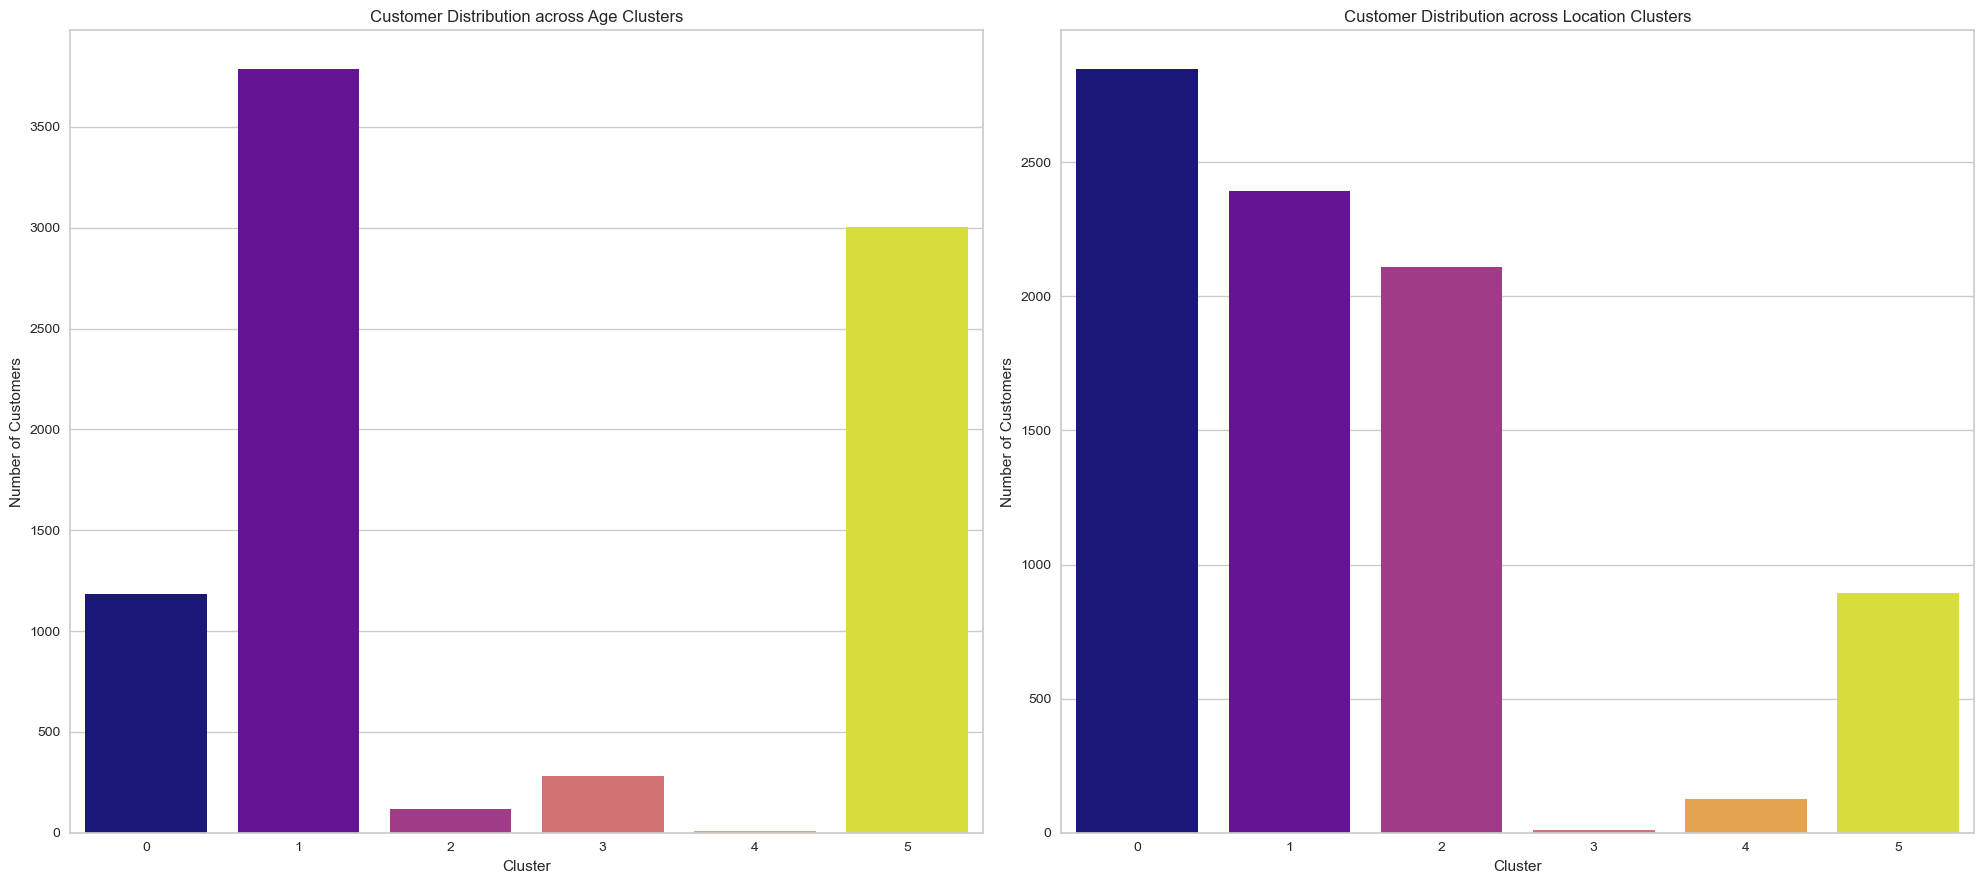

In [54]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Create subplots on the same line
fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# Plot for 'cluster_age_km'
sns.barplot(x='Cluster', y='Count', hue='Cluster', data=age_cluster_counts, palette='plasma', ax=axes[0], dodge=False)
axes[0].set_title('Customer Distribution across Age Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Number of Customers')
axes[0].legend().set_visible(False)

# Plot for 'cluster_location_km'
sns.barplot(x='Cluster', y='Count', hue='Cluster', data=location_cluster_counts, palette='plasma', ax=axes[1], dodge=False)
axes[1].set_title('Customer Distribution across Location Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Customers')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()

* Cluster_Age : Cluster 0, consisting of younger customers with lower activity, might be a potential target for engagement and marketing strategies to increase their transaction involvement. Cluster 2 and 4, representing both the group of young and old customers with moderate account balances and avergae transactions. This requires a tailored approach to meet their varying needs.

* Cluser_Location : Additionally, the bank can focus on serving customers from clusters 5, 1 and 0, which have distinct characteristics in terms of location and transaction behavior.

#### Conclusion

* Diverse Customer Landscape: includes clusters with younger customers having lower transaction activity (Cluster 5) to financially stable customers making sizeable transactions (Cluster 4).
* Youth Engagement Opportunity: Cluster 0, comprising younger customers with lower transaction activity, presents an opportunity for targeted marketing and engagement efforts.
* Location-Specific Strategies: clusters (Clusters 5, 1, and 0) highlight the importance of tailoring strategies to specific regions.
* High-Value Customers: Cluster 4 represents younger customers who engage in substantial transactions and maintain higher account balances.


 To optimize marketing efforts, the bank should focus on customer segments with higher representation, such  as clusters 1 and 2 (age-based clusters) and clusters 5, 1, and 0 (location-based clusters).
 
 
 Targeting these clusters can lead to effective customer engagement and better ROI on marketing campaigns.

## Labels

In [55]:
# Select only numeric columns
numeric_columns = df2.select_dtypes(include=['number'])

# Specify KMeans parameters
kmeans_params = {"init": "random", "max_iter": 300, "random_state": 42, "n_init": 10}

# Create KMeans instance
kmeans = KMeans(n_clusters=6, **kmeans_params)

# Fit KMeans to the numeric data
labels = kmeans.fit_predict(numeric_columns)

# Add the labels as a new column in the original DataFrame
df2['Label'] = labels

# Display the DataFrame with the new 'Label' column
df2.head()

CustLocation  CustAccountBalance  TransactionAmount (INR)       Age  \
0      0.705753           -0.102781                -0.226143 -1.062502   
1     -0.858739           -0.123790                -0.221513 -0.603701   
2     -0.555253           -0.115799                -0.224546 -0.603701   
3      0.705753           -0.117930                 0.483419 -0.259599   
4      1.506726            0.014851                 0.215741 -0.489000   

     Gender   Recency  Frequency  Monetary  cluster_age  cluster_location  \
0 -0.619190 -0.289603  -0.400317 -0.249139            1                 0   
1 -0.619190  1.681581  -0.400317 -0.244802            1                 1   
2 -0.619190  1.090226  -0.400317 -0.247643            1                 2   
3 -0.619190 -0.552428  -0.400317  0.415434            5                 0   
4  1.615012  1.484463  -0.400317  0.164728            1                 5   

     cen_xx    cen_xy    cen_yx    cen_yy color_age_km color_location_km  \
0 -0.734566 -0.112613  0.666731 -0.066276         pink            purple   
1 -0.734566 -0.112613 -1.196258 -0.078786         pink              pink   
2 -0.734566 -0.112613 -0.326765 -0.072891         pink           magenta   
3  0.104981 -0.059018  0.666731 -0.066276          red            purple   
4 -0.734566 -0.112613  1.732116 -0.079550         pink               red   

   Label  
0      2  
1      4  
2      4  
3      3  
4      1

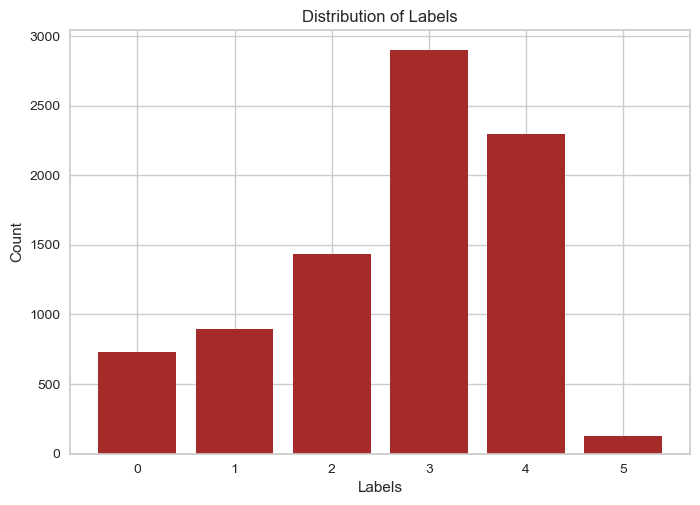

In [56]:
label_counts = df2['Label'].value_counts()

# Create a bar plot
plt.bar(label_counts.index, label_counts.values, color='brown')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [57]:
import plotly.express as px

cluster_labels = df2['Label']
cluster_centers = df2[['CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'Recency', 'Frequency', 'Monetary']]

# Specify attributes and colors
attributes = cluster_centers.columns
colors = px.colors.qualitative.Set1

fig = go.Figure()

# Iterate over clusters and add traces to radar plot
for cluster, color in zip(cluster_labels.unique(), colors):
    cluster_data = cluster_centers[cluster_labels == cluster]
    avg_values = cluster_data.mean()
    
    fig.add_trace(go.Scatterpolar(
        r=avg_values,
        theta=attributes,
        fill='toself',
        fillcolor=color,
        line=dict(color=color),
        opacity=0.7,  # Adjust the opacity here
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Radar Plot of Cluster Centroids"
)
fig.show()
